# Création de cartes de champ électrostatique créé par des particules ponctuelles chargées

Seules la direction et le sens sont affichés : pas la norme !

*Evidemment on peut adapter ce programme pour représenter un champ de gravitation : il suffit de choisir des charges négatives !*

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
### Constantes du problème  
xmin, ymin, xmax, ymax = -2, -2, 2.1, 2.1       # Taille de la zone en m
h = 0.25                                        # Pas de la grille sur la zone en m
K = 9.0E9                                       # Constante de Coulomb en USI
e = 1.60E-19                                    # Charge élémentaire en C

In [3]:
### Coordonnées (x,y) des points de la grille où tracer le champ.
X = np.arange(xmin, xmax, h)
Y = np.arange(ymin, ymax, h)
x, y = np.meshgrid(X, Y) # grille de points

In [4]:
###############################################################################################################
# Description des particules chargées (c'est là que des modifications peuvent avoir lieu !)
###############################################################################################################

### n particules identifiées par qi, xi, yi :
# chaque particule est représentée par un dictionnaires dont les clefs sont  :
# - q : la charge en multiple entier relatif de e (charge élementaire).
# - position : un couple de coordonnées (abscisse, ordonnée) en m.
# Remarque : on peut éviter de positionner une particule exactement sur un noeud de la grille pour éviter des divisions par zéro.

particules = [{'q':1, 'position':(-1.001, 0.001)}, 
              {'q':-1, 'position':(1.001, 0.001)},
             ]

In [5]:
#########################################
# calcul des champ électrostatiques créés
#########################################
champs_E = [] # cette liste contiendra les composantes de tous les champs créés par chaque particule

for particule in particules:
    ### Distances entre la particule et les noeuds (x, y) de la grille
    xi, yi = particule['position']
    r = ((x - xi)**2 + (y - yi)**2)**0.5
    ### Intensité du champ E créé par la particule
    q = particule['q']
    E = K * q * e / r**2
    ### Coordonnées cartésiennes du vecteur unitaire (direction + sens de E)
    ux = (x - xi) / r
    uy = (y - yi) / r
    ### Coordonnées cartésiennes du champ E
    Ex = E * ux
    Ey = E * uy
    ### ajout du champ de la particule en cours de traitement dans la liste de tous les champs
    champs_E.append((Ex, Ey))

In [6]:
### Coordonnées du champ total E_tot
Ex_tot, Ey_tot = 0, 0

for (Ex, Ey) in champs_E:
    Ex_tot += Ex
    Ey_tot += Ey
    
### Norme du vecteur E_tot
E_tot = (Ex_tot**2 + Ey_tot**2)**0.5     

### vecteur E_tot normalisé  (pour avoir des flèches de taille identique)
# commenter les 2 lignes suivantes pour voir le champ non normalisé !
Ex_tot = Ex_tot / E_tot
Ey_tot = Ey_tot / E_tot

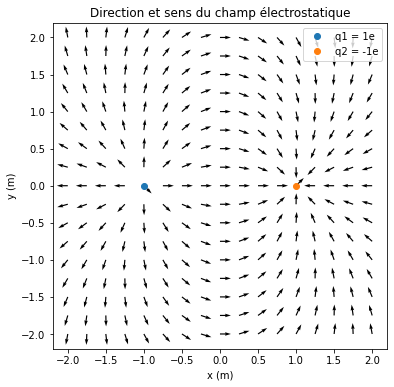

In [7]:
### Tracé des vecteurs normalisés
#plt.rcParams['axes.formatter.use_locale'] = True
plt.figure(1, figsize=(6, 6))
plt.quiver(x, y, Ex_tot, Ey_tot) # quiver permet de tracer un champ

# dessin des particules
for (i, particule) in enumerate(particules):
    xi, yi = particule['position']
    q = particule['q']
    plt.plot(xi, yi, "o", label=f"q{i+1} = {q}e") 
    
# annotations du graphique
plt.legend(loc='upper right')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Direction et sens du champ électrostatique")
plt.show()

# Tout en un avec une fonction qui en prend en paramètre la liste des particules

In [8]:
def carte_champ(particules, legende=True):
    import numpy as np
    import matplotlib.pylab as plt
    
    ### Constantes du problème  
    xmin, ymin, xmax, ymax = -2, -2, 2.1, 2.1       # Taille de la zone en m
    h = 0.25                                        # Pas de la grille sur la zone en m
    K = 9.0E9                                       # Constante de Coulomb en USI
    e = 1.60E-19                                    # Charge élémentaire en C
    
    ### Coordonnées (x,y) des points de la grille où tracer le champ.
    X = np.arange(xmin, xmax, h)
    Y = np.arange(ymin, ymax, h)
    x, y = np.meshgrid(X, Y) # grille de points
    
    ### calcul du champ électrostatique total 
    Ex, Ey = 0, 0 # coordonnées du champ total

    for particule in particules:
        ### Distances entre la particule et les noeuds (x, y) de la grille
        xi, yi = particule['position']
        r = ((x - xi)**2 + (y - yi)**2)**0.5
        ### Intensité du champ E créé par la particule
        q = particule['q']
        E = K * q * e / r**2
        ### Coordonnées cartésiennes du vecteur unitaire (direction + sens de E)
        ux = (x - xi) / r
        uy = (y - yi) / r
        ### MAJ des coordonnées cartésiennes du champ total
        Ex += E * ux
        Ey += E * uy
        
    ### Norme du vecteur E total
    E = (Ex**2 + Ey**2)**0.5     
    ### vecteur E normalisé (pour avoir des flèches de taille identique)
    Ex, Ey = Ex/E, Ey/E
    
    ### Tracé des vecteurs normalisés
    #plt.rcParams['axes.formatter.use_locale'] = True
    plt.figure(1, figsize=(6, 6))
    plt.quiver(x, y, Ex, Ey) # quiver permet de tracer un champ

    # dessin des particules
    for (i, particule) in enumerate(particules):
        xi, yi = particule['position']
        q = particule['q']
        plt.plot(xi, yi, "o", label=f"q{i+1} = {q}e") 

    # annotations du graphique
    if legende: plt.legend(loc='upper right')
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.title("Direction et sens du champ électrostatique")
    plt.show()

## Particule unique chargée positivement

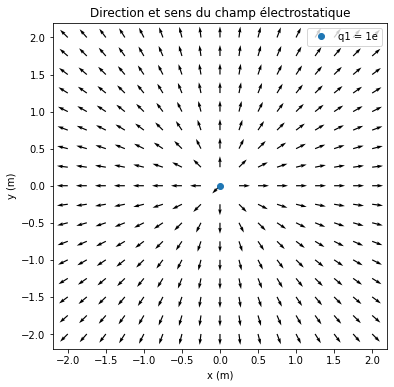

In [9]:
particules = [{'q':1, 'position':(0.001, 0.001)}]

carte_champ(particules)

## Particule unique chargée négativement

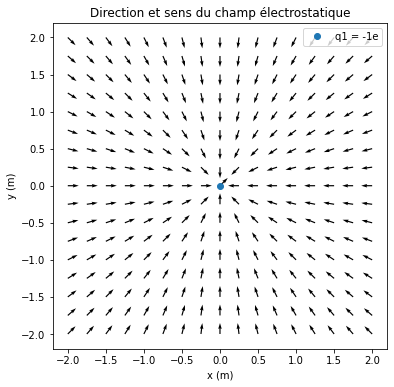

In [10]:
particules = [{'q':-1, 'position':(0.001, 0.001)}]

carte_champ(particules)

## Dipôle

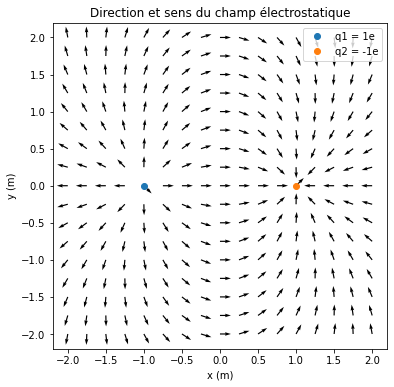

In [11]:
particules = [{'q':1, 'position':(-1.001, 0.001)}, {'q':-1, 'position':(1.001, 0.001)}]

carte_champ(particules)

## Dipôle disymétrique en charge

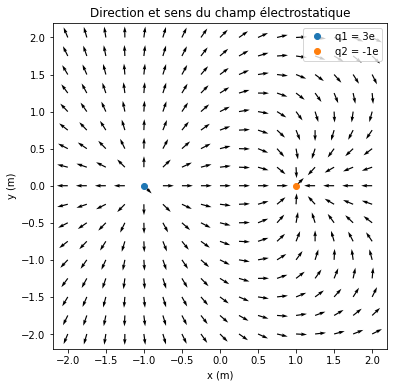

In [12]:
particules = [{'q':3, 'position':(-1.001, 0.001)},{'q':-1, 'position':(1.001, 0.001)},]

carte_champ(particules)

## Condensateur plan

In [13]:
armature1 = [{'q':1, 'position':(-1.001, y/10)} for y in range(-10, 11)] 
armature2 = [{'q':-1, 'position':(1.001, y/10)} for y in range(-10, 11)] 
particules = armature1 + armature2

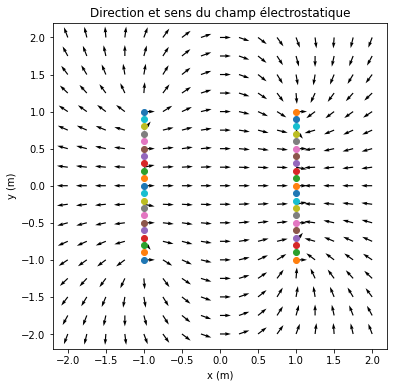

In [14]:
carte_champ(particules, False)